## SYRIATEL CUSTOMER CHURN

## Project overview

The project's aim is to develop a machine learning model to predict customer churn for SyriaTel, a telecommunications company. The dataset includes various features such as customer service calls, total day charge, and total day minutes. The objective is to create a model that will accurately identify customers who are likely to churn, allowing the company to implement targeted retention strategies

## Business understanding

The project focuses on predicting customer churn for SyriaTel, a telecommunications company. Churn prediction is crucial for telecom companies as retaining customers is significantly cheaper than acquiring new ones. Identifying customers who are likely to churn allows the company to implement proactive retention strategies, such as offering discounts or personalized services, to reduce churn rates and maintain revenue.

Stakeholders

- SyriaTel Telecom Company: The primary stakeholder is SyriaTel itself. By accurately predicting churn, the company can proactively address customer issues, improve service quality, and implement targeted retention campaigns. This will ultimately lead to increased customer satisfaction, reduced churn rates, and higher revenue for the company.
- Customer Service Department: The customer service department can benefit from the churn prediction model by prioritizing customer inquiries based on their likelihood to churn. This allows them to provide proactive support to potentially churned customers, addressing their concerns promptly and potentially preventing them from leaving.
- Marketing and Sales Teams: These teams can utilize the churn prediction model to identify at-risk customers and tailor marketing campaigns or special offers to retain them. By focusing on retaining existing customers, the marketing and sales teams can improve customer loyalty and maximize revenue.

## Problem statement

SyriaTel, a telecommunications company, is facing a challenge with a high number of customers leaving their services, known as churn. They want to find out why customers are leaving and develop strategies to reduce this churn rate(14.5%). By understanding the reasons behind customer attrition, SyriaTel aims to improve customer retention and ultimately increase profitability.

## Data Understanding

The dataset is from SyriaTel Telecommunication company and was obtained from Kaggle . It comprises of 21 columns and 3333 rows. The columns have various attributes related to customer demographics, service usage, and churn behavior. The rows correspond to a recorded customer. The dataset encompasses both continuous and categorical variables. The target variable identified is "churn," with the remaining variables serving as predictors.

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [40]:
#load the data
df = pd.read_csv("Churn_data.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Data Preparation

In [41]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [42]:
# checking the shape of the dataset
df.shape

(3333, 21)

In [43]:
#statistical summary
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data cleaning

In [44]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in any of the columns in the dataframe

In [45]:
# checking for duplicated values
df.duplicated().sum()

0

In [46]:
#checking for number of unique values in the features
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

## Exploratory Data Analysis

In [47]:
# Separate numeric and categorical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical cols:")
for col in numerical_cols:
    print(col)

# Print the names of categorical variables
print("\nCategorical cols:")
for col in categorical_cols:
    print(col)


Numerical cols:
account length
area code
number vmail messages
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
customer service calls

Categorical cols:
state
phone number
international plan
voice mail plan


In [48]:
# checking for missing values in form of placeholders
categorical_columns = ['state', 'international plan', 'voice mail plan', 'churn']

for column in categorical_columns:
    unique_values = df[column].unique()
    total_unique = len(unique_values)
    print(f"Unique values in {column}: {unique_values} total= {total_unique}")

Unique values in state: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] total= 51
Unique values in international plan: ['no' 'yes'] total= 2
Unique values in voice mail plan: ['yes' 'no'] total= 2
Unique values in churn: [False  True] total= 2


There are no missing values in form of placeholders

In [49]:
# drop phone numbers,area code and state as they do not affect churn
df = df.drop(columns=["phone number","area code","state"])
df.head()


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [50]:
df['churn'] = df['churn'].map({False: 0, True: 1})
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [51]:
# Check value counts
df['churn'].value_counts()


churn
0    2850
1     483
Name: count, dtype: int64

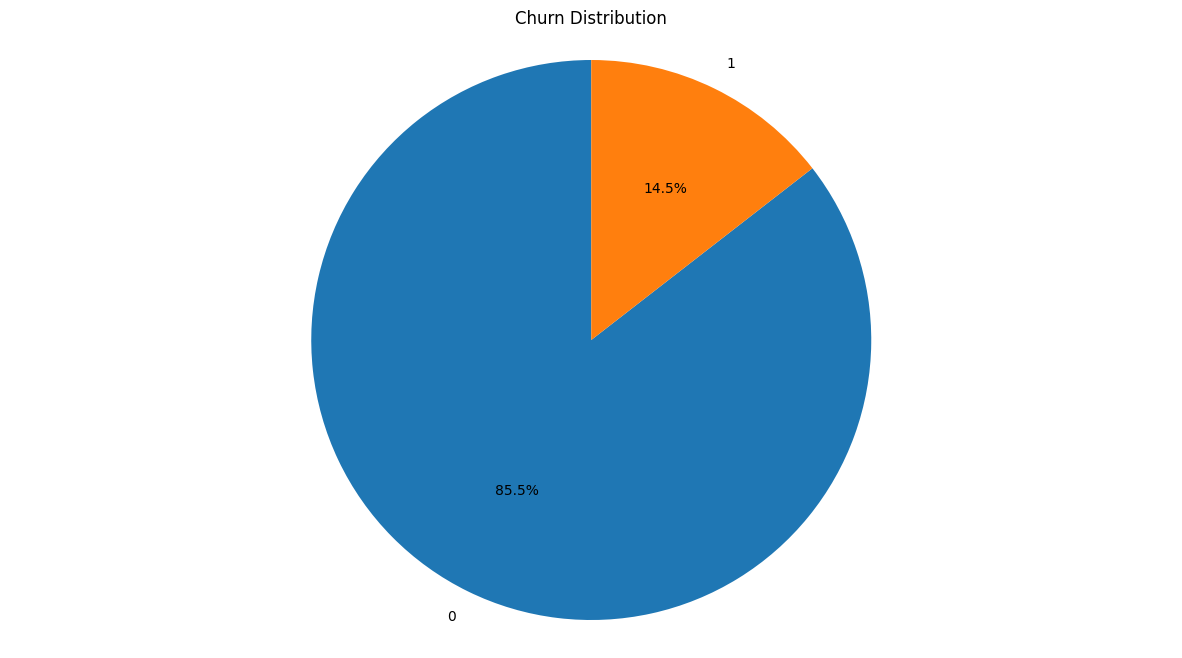

In [52]:
 #representing the same using a Pie Chart to visualize the percentages
churn_counts = df['churn'].value_counts()

# Create a new figure with a larger size
plt.figure(figsize=(15, 8))

# Create a pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Churn is the target variable for this dataset .From the above pie chart,the distribution of the binary classes shows a data imbalance as the number of non-churned customers far outweighs the number of churned customers.Addressing class imbalance is crucial to ensure that the predictive model accurately captures patterns. Therefore SMOTE will be applied

In [53]:
df['international plan'] = df['international plan'].map({'no': 0, 'yes': 1})
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [54]:
df['voice mail plan'] = df['voice mail plan'].map({'no': 0, 'yes': 1})
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

## Feature Analysis

## Distribution plot for numeric features

<Axes: xlabel='customer service calls', ylabel='Density'>

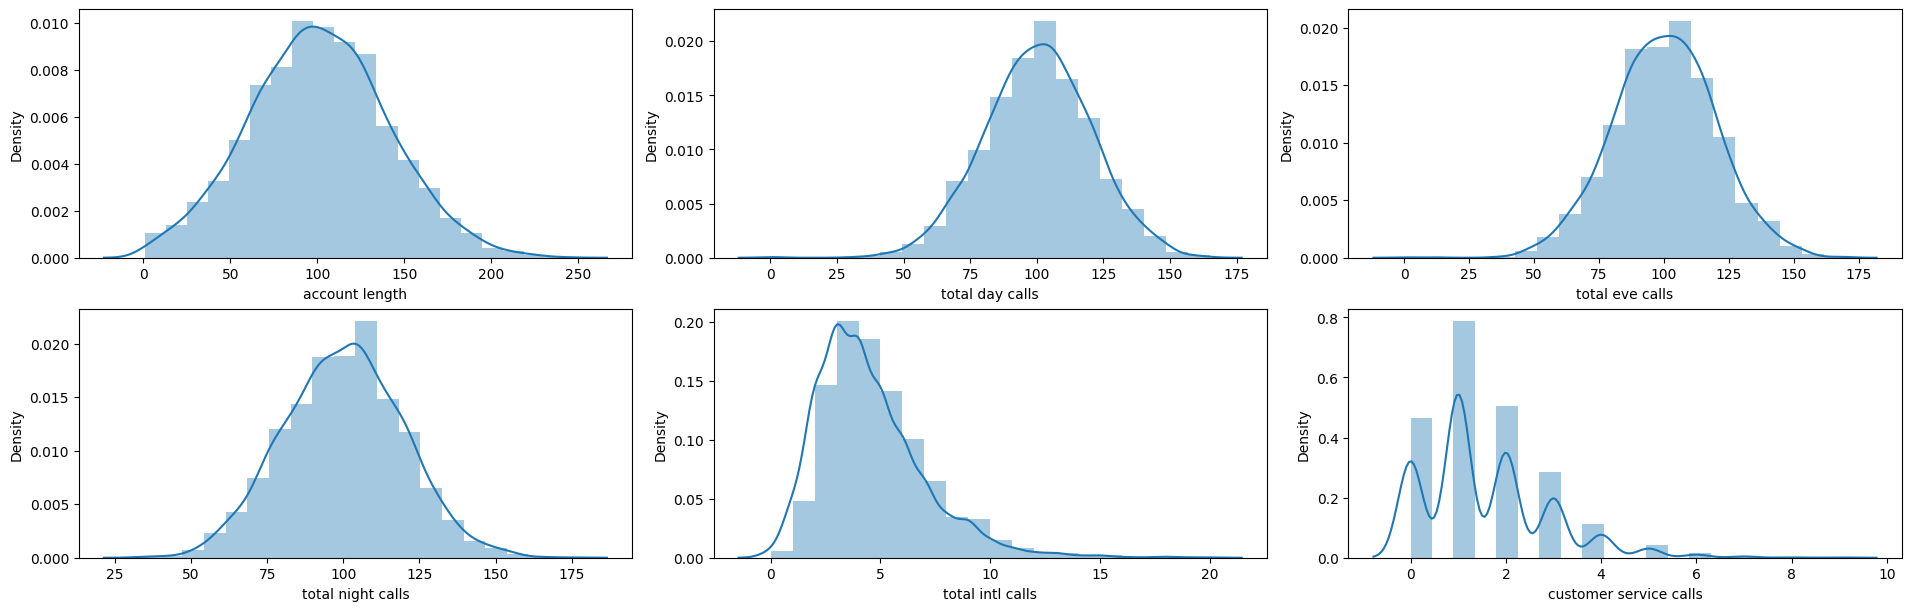

In [56]:
f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["account length"],bins=20,ax=ax[0,0]);

sns.distplot(df["total day calls"],bins=20,ax=ax[0,1]);

sns.distplot(df["total eve calls"],bins=20,ax=ax[0,2]);

sns.distplot(df["total night calls"],bins=20,ax=ax[1,0]);

sns.distplot(df["total intl calls"],bins=20,ax=ax[1,1]);

sns.distplot(df["customer service calls"],bins=20,ax=ax[1,2])

- From the distribution plot above all of them except customer service calls, have a normal distribution. Total international calls seems to be skewed to the right side

- Customer service has few peaks which correspond to clusters of customers who have made a similar number of calls to customer service.This is okay  because customer service calls are discrete, meaning they can only take integer values. 

## correletion heatmap for numeric variables

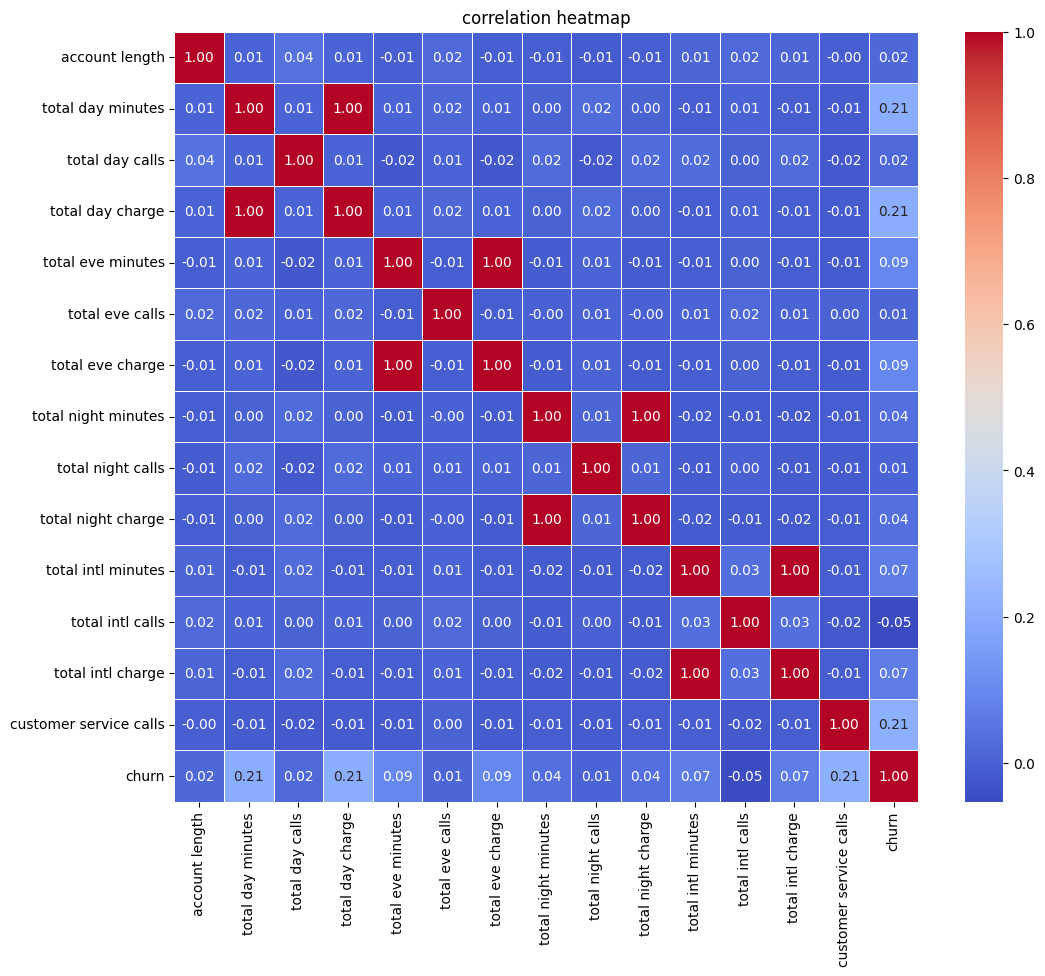

In [57]:
numerical_cols = ['account length', 'total day minutes', 'total day calls', 'total day charge',
                  'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes',
                  'total night calls', 'total night charge', 'total intl minutes', 'total intl calls',
                  'total intl charge', 'customer service calls','churn']
corr_mat = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('correlation heatmap')
plt.show()

- Most features don't show strong correlations with each other, but there are some pairs that have a perfect correlation. For example, there's a perfect positive correlation between the features representing the total minutes used during the day, evening, night, and for international calls, and their corresponding charges. This perfect correlation makes sense because the charge is directly dependent on the minutes used. This perfect correlation, or multicollinearity, isn't a big issue for non-linear models, unlike linear models where it can cause problems.

In [58]:
#Identifying the variables that are highly correlated
highly_correlated_variables_df = (
    df
    .corr()
    .abs()
    .stack()
    .reset_index()
    .sort_values(0, ascending=False)
)

highly_correlated_variables_df['variable_pairs'] = list(zip(highly_correlated_variables_df.level_0, highly_correlated_variables_df.level_1))
highly_correlated_variables_df = highly_correlated_variables_df.set_index('variable_pairs').drop(columns=['level_1', 'level_0'])
highly_correlated_variables_df.columns = ['correlation_coefficient']
highly_correlated_variables_df = highly_correlated_variables_df.drop_duplicates()

filter_condition = (highly_correlated_variables_df.correlation_coefficient > 0.75) & (highly_correlated_variables_df.correlation_coefficient < 1)
highly_correlated_variables_df[filter_condition]

,correlation_coefficient
variable_pairs,
"(total day minutes, total day charge)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total night charge, total night minutes)",0.999999
"(total intl charge, total intl minutes)",0.999993
"(number vmail messages, voice mail plan)",0.956927


In [59]:
churn_corr = corr_mat['churn'].sort_values(ascending=False)

churn_corr

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
total night calls         0.006141
total intl calls         -0.052844
Name: churn, dtype: float64

- The correlation analysis reveals that customer churn shows a positive correlation with variables such as customer service calls, total day minutes, and total day charge. This suggests that as the number of customer service calls and total usage minutes increases, so does the likelihood of churn.
- Other variables like total eve charge and total intl charge also show positive correlations, although weaker.
- Conversely, variables like account length and total eve calls display weak negative correlations with churn.
- Some variables, such as total night calls and 'total intl calls', demonstrate very weak correlation with churn.

#### Customer service calls VS Churn

In [60]:
#churn rate across different number of calls
cust_serv_calls = pd.DataFrame(df.groupby(['customer service calls'])['churn'].mean()).reset_index()
cust_serv_calls

,customer service calls,churn
0,0,0.131994
1,1,0.103302
2,2,0.114625
3,3,0.102564
4,4,0.457831
5,5,0.606061
6,6,0.636364
7,7,0.555556
8,8,0.500000
9,9,1.000000


- Customers who made three calls to customer service had the lowest churn rate followed by 1.
- The churn rate increased as the number of calls to customer service exceeded three.
- Excessive interactions with customer service may indicate dissatisfaction or unresolved issues, potentially leading to higher churn rates.
-  customers with no interactions with customer service exhibited a higher churn rate than those who made three calls which could indicate dissatisfaction.

#### Total day Minutes VS Churn

In [61]:
total_day_minutes = pd.DataFrame(df.groupby(df['churn'])['total day minutes'].mean()).reset_index() 
total_day_minutes

,churn,total day minutes
0,0,175.175754
1,1,206.914079


- Non-churned customers have an average total day minutes of approximately 175.18.
- Churned customers, however, exhibit a higher average total day minutes of around 206.91.
- This suggests that customers who end up churning tend to have higher usage of daytime minutes compared to those who remain with the service.

#### Total day charge VS Churn

In [62]:
#Finding average spending by a customer who churns and an active customer
total_day_charge = pd.DataFrame(df.groupby(df['churn'])['total day charge'].mean()).reset_index() 
total_day_charge

,churn,total day charge
0,0,29.780421
1,1,35.175921


- Non-churned customers have an average total day charge of approximately 29.78.
- Churned customers, on the other hand, exhibit a higher average total day charge of around 35.18.
- This implies that customers who end up churning tend to have higher charges for daytime usage compared to those who remain with the service.

### Detecting Outliers

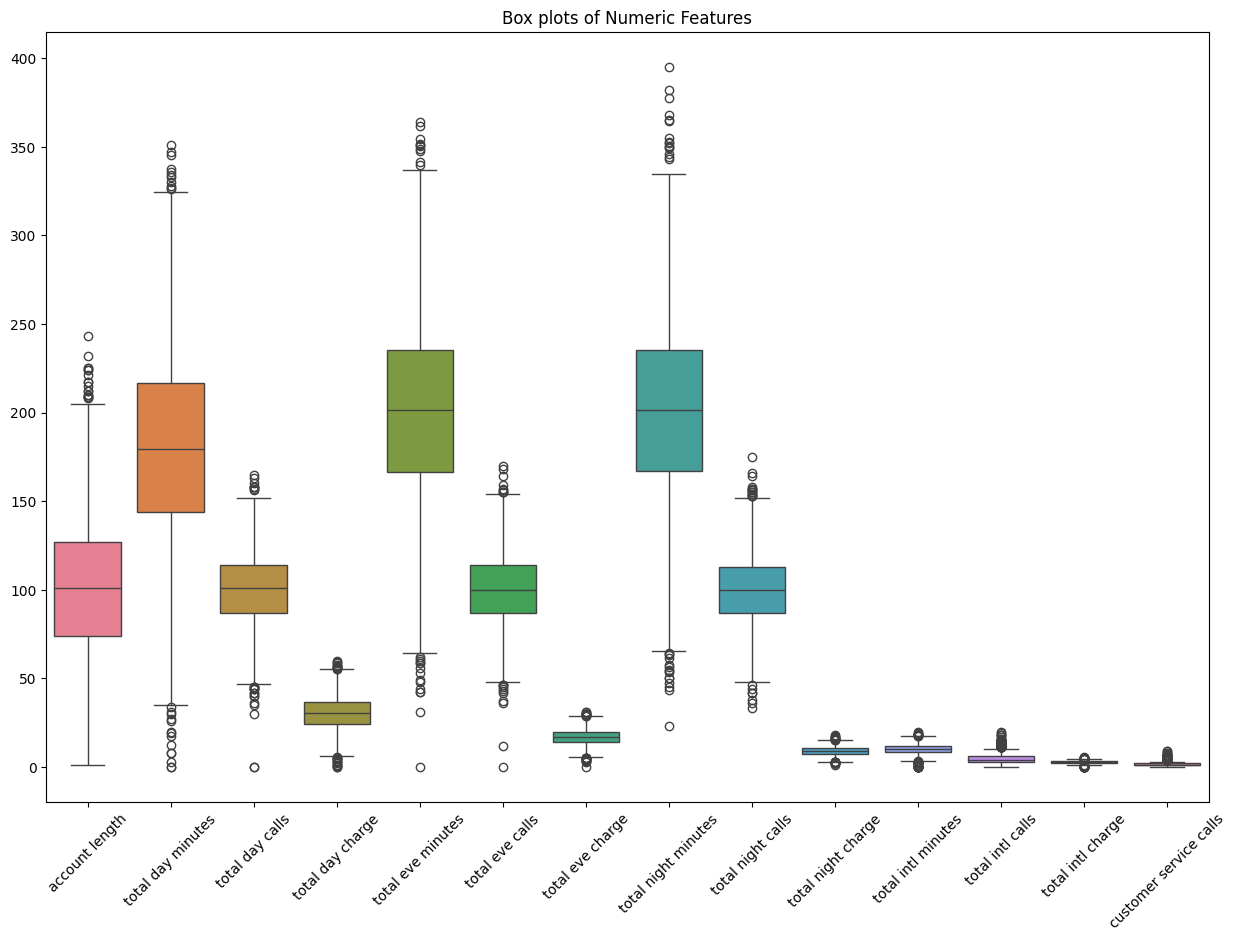

In [63]:

numeric_features = ['account length', 'total day minutes', 'total day calls', 'total day charge',
                    'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes',
                    'total night calls', 'total night charge', 'total intl minutes', 'total intl calls',
                    'total intl charge', 'customer service calls']

# Create box plots for each numeric feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_features])
plt.title('Box plots of Numeric Features')
plt.xticks(rotation=45)
plt.show()


- The box plots reveal outliers within the numeric features, indicating the presence of potentially significant data points. While these outliers deviate from the typical distribution, retaining them acknowledges the possibility of important and impactful observations that could enrich the analysis and yield valuable insights.







### Categorical Features Analysis

In [64]:
# Calculate percentages for each category
categorical_cols = ["international plan", "voice mail plan", "churn"]
total_counts = len(df)

for col in categorical_cols:
    counts = df[col].value_counts(normalize=True) * 100
    print(f"{col} Distribution:")
    print(counts)
    print("\n")


international plan Distribution:
international plan
0    90.309031
1     9.690969
Name: proportion, dtype: float64


voice mail plan Distribution:
voice mail plan
0    72.337234
1    27.662766
Name: proportion, dtype: float64


churn Distribution:
churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64




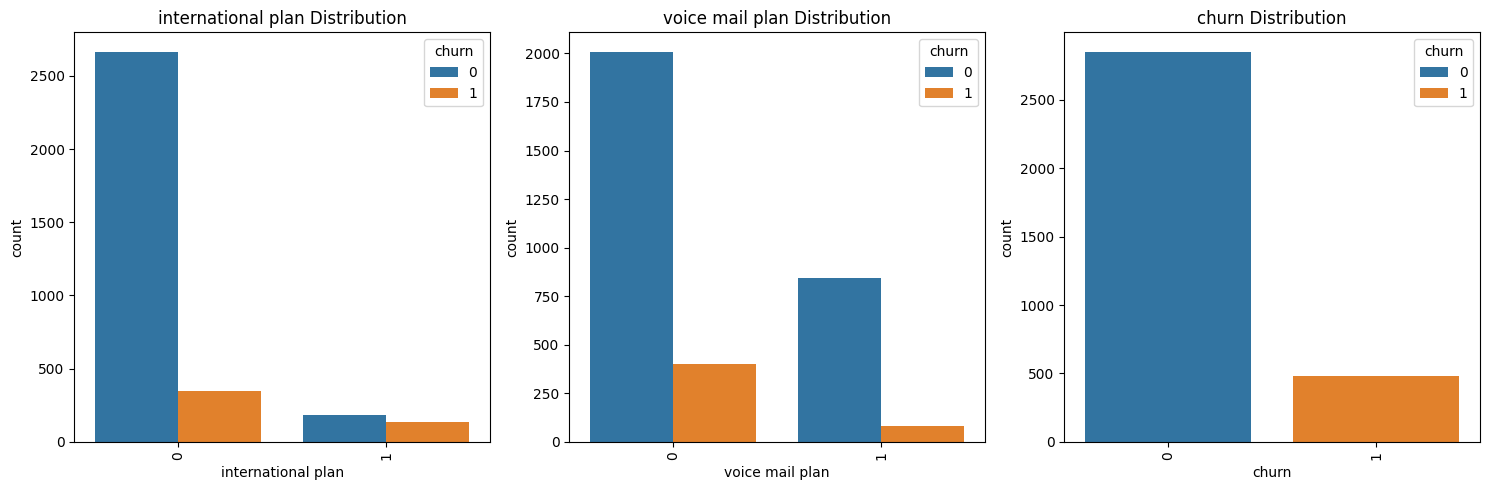

In [65]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))


categorical_cols = ["international plan", "voice mail plan", "churn"]
total_counts = len(df)

for i, col in enumerate(categorical_cols):
   
    sns.countplot(x=col, hue="churn", data=df, ax=axs[i])
    axs[i].set_title(f"{col} Distribution")
    axs[i].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()


- The majority of customers around 90.3%, do not have an international plan. Conversely, there is a smaller subset of 9.7% customers who have opted for an international plan.

- The data indicates that the majority of observations, approximately 85.5%, represent customers who did not churn. A smaller subset, comprising approximately 14.5% of the observations, represents customers who churned. These percentages highlight the imbalance in churn behavior.

- The majority of customers, approximately 72.3% , do not have a voice mail plan.A subset of customers, approximately 27.7% , have opted for a voice mail plan.

## Data Preprocessing

### One-Hot Encoding

In [66]:
df = pd.get_dummies(df,columns = ['international plan','voice mail plan'])
df.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_0,international plan_1,voice mail plan_0,voice mail plan_1
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,True,False,False,True
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,True,False,False,True
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,True,False,True,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,False,True,True,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,False,True,True,False


 One Hot Encoding involves transforming categorical variables into a series of binary attributes. It works by generating a new attribute for each category, assigning a value of 1 if the category exists and 0 if it doesn't.

## Scaling numeric features

Scaling involves adjusting numerical values to a standardized range, making comparisons easier and reducing the impact of varying magnitudes. In this case, the Min-Max Normalization technique is implemented to achieve this standardization.



In [67]:
# Define the numeric columns to be scaled
numeric_columns = ['number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
                   'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes',
                   'total night calls', 'total night charge', 'total intl minutes', 'total intl calls',
                   'total intl charge', 'customer service calls', 'account length']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


## Train-Test split

Splitting the dataset into training and testing .80% training and 20% testing

In [68]:
X = df.drop(columns=['churn'])  
y = df['churn']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Shapes of training and testing sets:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Shapes of training and testing sets:
X_train: (2666, 19)
y_train: (2666,)
X_test: (667, 19)
y_test: (667,)


## Applying SMOTE to churn feature

SMOTE is an oversampling technique specifically designed to address class imbalance. It generates synthetic samples for the minority class by interpolating between existing positive instances. By doing so, SMOTE helps to balance the class distribution and mitigate the overfitting problem that can arise with random oversampling. 

In [69]:
df.churn.value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

##### Applying SMOTE

In [70]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

Shape of X_train_resampled: (4568, 19)
Shape of y_train_resampled: (4568,)


In [71]:
y_train_resampled.value_counts()

churn
0    2284
1    2284
Name: count, dtype: int64

# MODELING

### Logistic Regression Classifier(Baseline model)

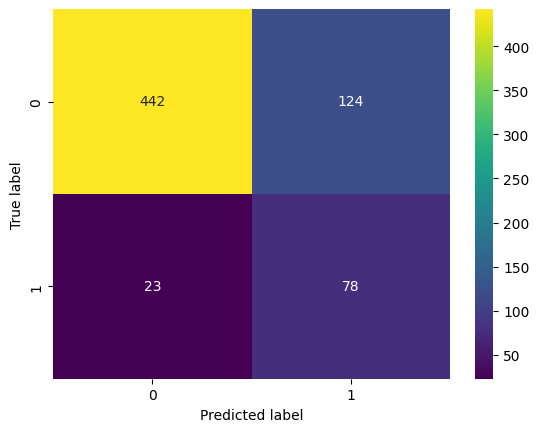

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       566
           1       0.39      0.77      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667



In [72]:
#instantiate the logistic regression
logreg = LogisticRegression(random_state=42)
# Fit the model on the training data 
logreg.fit(X_train_resampled, y_train_resampled)
#predict on the labels of test set
y_pred_log = logreg.predict(X_test)
# plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
plot_confusion_matrix(y_test, y_pred_log, [0,1])
print(classification_report(y_test,y_pred_log))

  ### Main Metric of success
- Recall (true positive rate) will be the main metric of success. Maximizing recall ensures that the model effectively captures as many actual churn cases as possible, minimizing the risk of losing customers.The aim is to achieve a recall of 80%.Other performace metrics such as Precision,Accuracy,F1 score will be used.

- Precision: The model correctly identifies 39% of the predicted churn cases out of all positive predictions. It indicates the accuracy of churn predictions, essential for minimizing false positives.

- Recall: The model captures 77% of actual churn cases, highlighting its ability to identify churn instances. 

- Accuracy: Overall, the model achieves an accuracy of 78%, meaning it correctly predicts 78% of instances in the test set. 

in the confusion matrix:

- True Positives (TP): 78 instances correctly predicted as positive.
- False Positives (FP): 124 instances incorrectly predicted as positive.
- True Negatives (TN): 442 instances correctly predicted as negative.
- False Negatives (FN): 23 instances incorrectly predicted as negative.

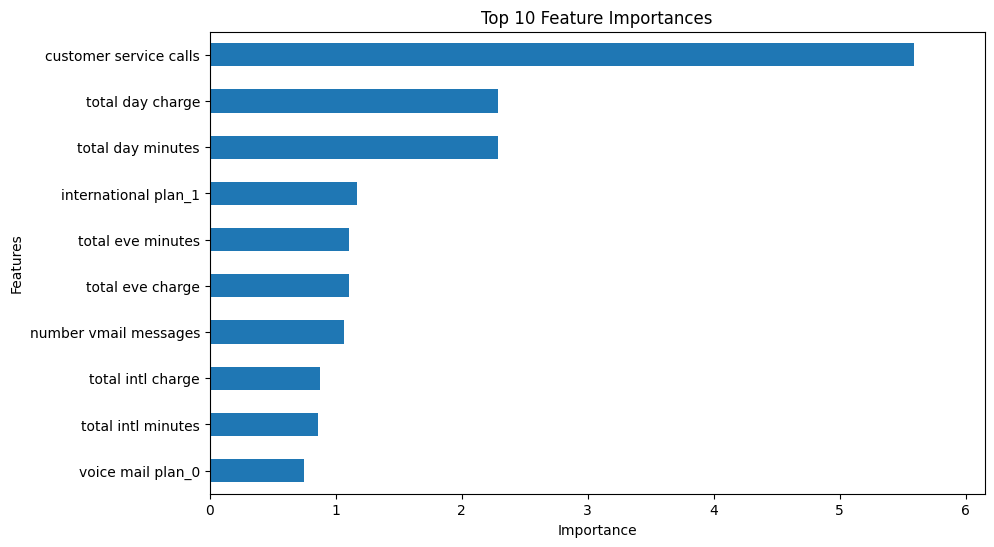

In [73]:
# Feature Importances
importance = logreg.coef_[0]
feature_names = X_train_resampled.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)  
plt.show()


The top three important features in this model are customer service calls, total day charge, and total day minutes. These features reflect customer behavior and usage patterns. Higher numbers of customer service calls and total day minutes, along with higher total day charges, suggest potential dissatisfaction or heavier service usage, which could lead to churn

## 2. Decission Trees

A decision tree is a visual representation of a decision-making process. It helps in solving problems by breaking them down into smaller, more manageable steps based on input features. As the process progresses, decisions are made at each step until a conclusion or prediction is reached. This method is widely used in machine learning for classification and regression tasks.





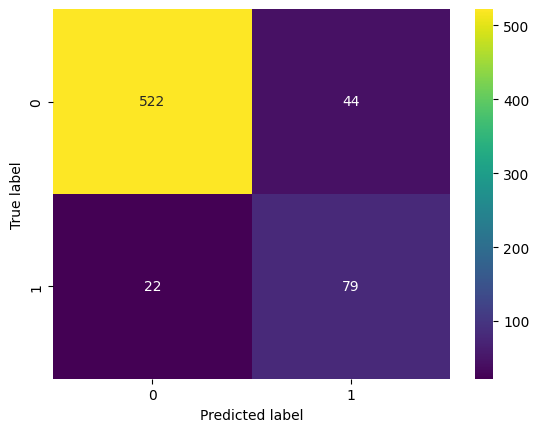

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       566
           1       0.64      0.78      0.71       101

    accuracy                           0.90       667
   macro avg       0.80      0.85      0.82       667
weighted avg       0.91      0.90      0.90       667



In [74]:
#Instantiate DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
#Fit on the training data
dt_clf.fit(X_train_resampled,y_train_resampled)

#predict on the test set
y_pred_dt = dt_clf.predict(X_test)
# plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_dt, [0,1])
print(classification_report(y_test,y_pred_dt))


- For class 0 (no churn), precision is 0.96, recall is 0.92, and F1-score is 0.94.
- For class 1 (churn), precision is 0.64, recall is 0.78, and F1-score is 0.71.
- Overall accuracy is 0.90.
- The model performs well in predicting no churn but has lower performance in detecting churn, therefore,need for improvement in predicting churn cases.

In the confusion matrix:

- True Positives (TP): 79 instances correctly predicted as positive.
- False Positives (FP): 44 instances incorrectly predicted as positive.
- True Negatives (TN): 522 instances correctly predicted as negative.
- False Negatives (FN): 22 instances incorrectly predicted as negative.

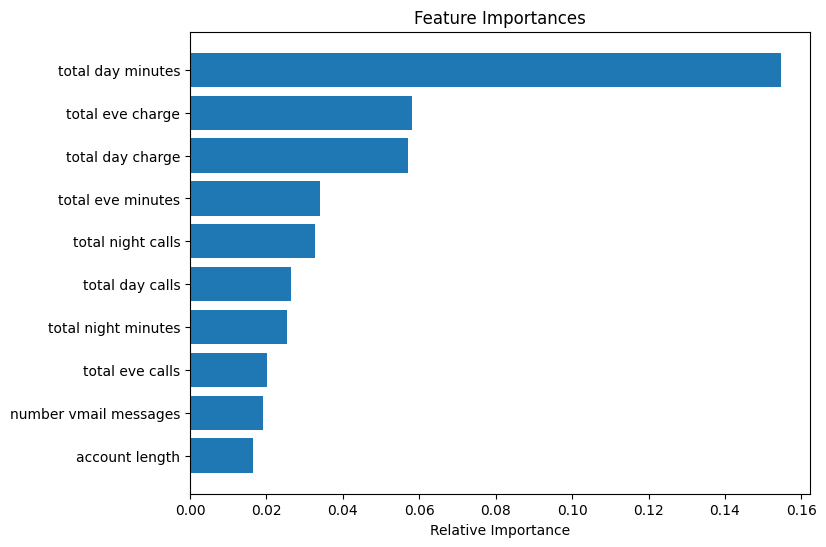

In [75]:
# Feature Importances
feature_names = list(X_train_resampled.columns)
importances = dt_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


- The top three most important features are total day minutes,total eve charge and total day charge
- These features are crucial in predicting churn as they likely indicate higher usage and associated charges during daytime and evening hours, which could be indicative of dissatisfaction or potential reasons for customers to leave the service.

## 3. Random Forest classifier

Random Forest Classifier is an ensemble learning method. It builds multiple decision trees, known as the ensemble, and combines their predictions to improve the overall performance and robustness of the model

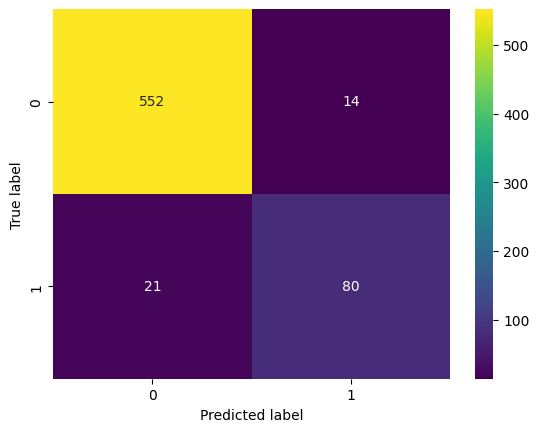

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       566
           1       0.85      0.79      0.82       101

    accuracy                           0.95       667
   macro avg       0.91      0.88      0.89       667
weighted avg       0.95      0.95      0.95       667



In [76]:
#Instantiate the classifier
rf_clf= RandomForestClassifier(random_state=42)

#Fit on the training data
rf_clf.fit(X_train_resampled,y_train_resampled)
#predict on the test data
y_pred_rf = rf_clf.predict(X_test)
#plot confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, [0,1])
print(classification_report(y_test,y_pred_rf))

- Precision: The precision for class 0 remains the same at 96%, while the precision for class 1 has improved from 64% to 85%. This suggests that the model is making fewer false positive predictions for churn cases.
- Recall: The recall for class 0 has improved from 92% to 98%, indicating that the model is better at identifying non-churn cases. The recall for class 1 remains relatively stable
- Accuracy: The accuracy has increased from 90% to 95%, indicating that the model's overall predictive performance has improved.

Confusion Matrix

- True Positives (TP): 80 instances correctly predicted as positive.
- False Positives (FP): 14 instances incorrectly predicted as positive.
- True Negatives (TN): 522 instances correctly predicted as negative.
- False Negatives (FN): 21 instances incorrectly predicted as negative

In [77]:
rf_clf.feature_importances_

array([0.02869806, 0.02078292, 0.11473704, 0.03045084, 0.12027878,
       0.0504521 , 0.02544946, 0.05227847, 0.03467082, 0.02823095,
       0.03754651, 0.03721751, 0.06965083, 0.03427444, 0.18347831,
       0.05605564, 0.05287544, 0.01189748, 0.0109744 ])

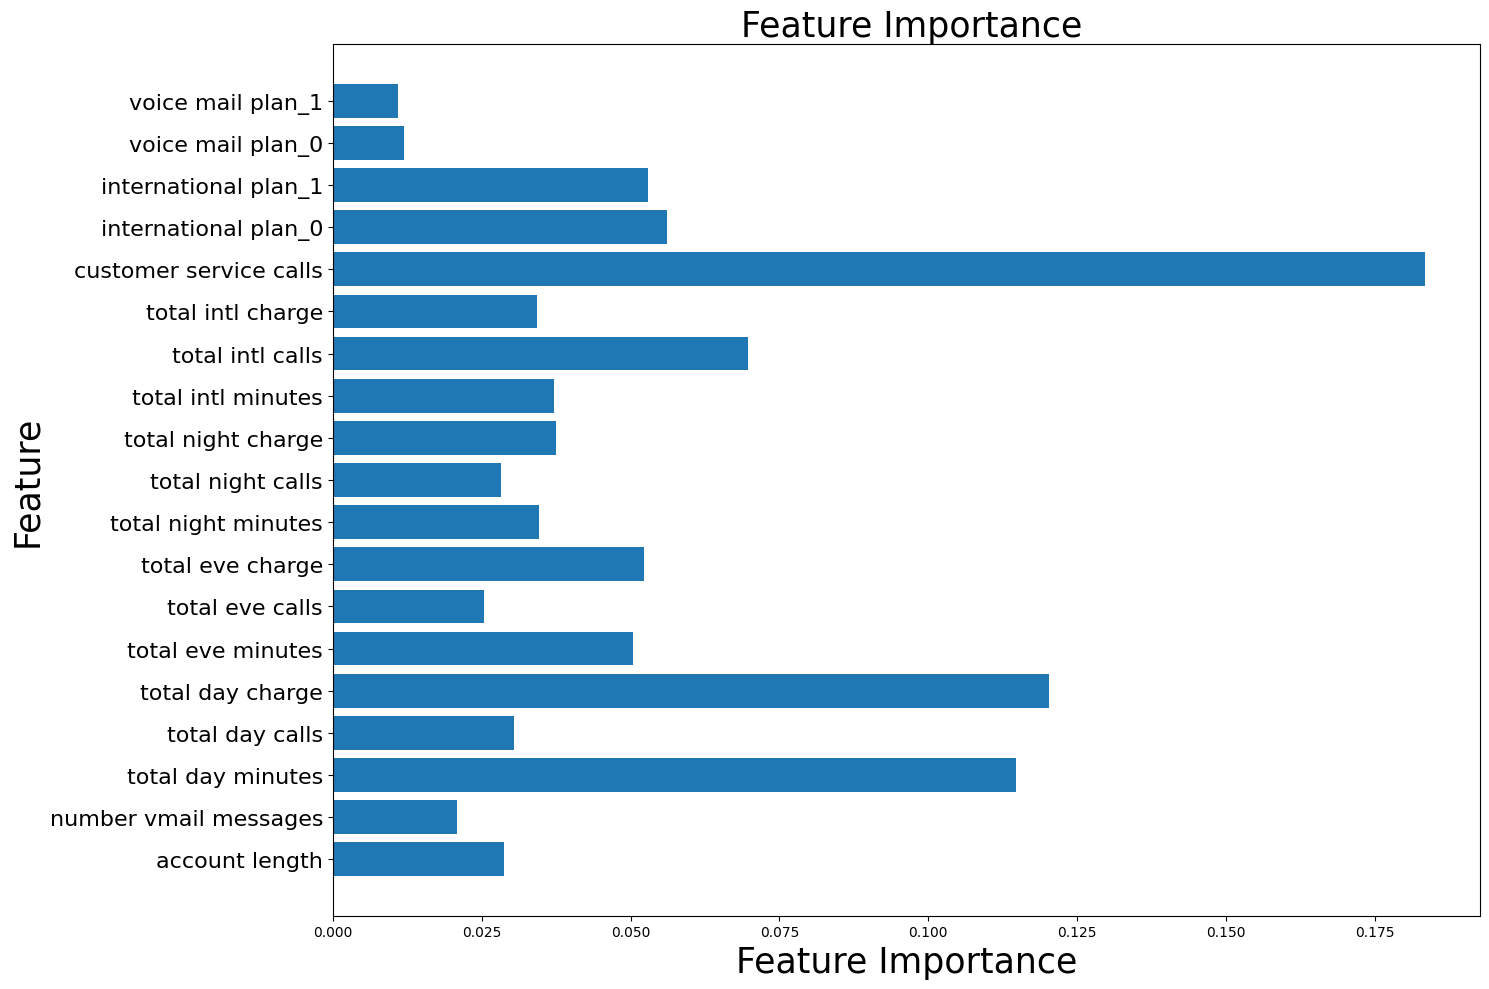

In [78]:
#plotting barh for the features 

def plot_features_importances(rf_clf):
    n_features = X_test.shape[1]
    plt.figure(figsize=(15,10))
    plt.barh(range(n_features), rf_clf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_test.columns.values, fontsize = 16)
    plt.xlabel('Feature Importance', fontsize = 25)
    plt.ylabel('Feature', fontsize = 25)
    plt.title(' Feature Importance', fontsize = 25)
    plt.tight_layout()
    
plot_features_importances(rf_clf)


- The top three important features from the Random Forest Classifier model are customer service calls, total day charge, and total day minutes.
- These features reflect customer behavior, service usage patterns, and associated charges.
- Higher numbers of customer service calls and total day minutes, as well as higher total day charges, may indicate dissatisfaction, potentially leading to churn

## 4. XGBoost

XGBoost is a powerful machine learning algorithm known for its efficiency and accuracy in handling structured data. It's an ensemble method, leveraging gradient boosting to combine multiple weak learners, usually decision trees, into a strong predictive model. Highly customizable and robust, XGBoost is widely used across different domains for tasks like classification, regression, and ranking.

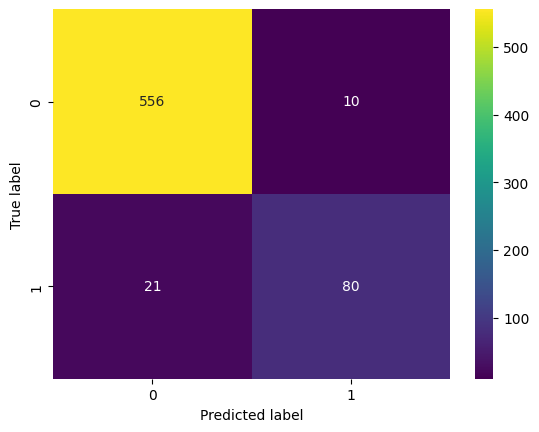

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       566
           1       0.89      0.79      0.84       101

    accuracy                           0.95       667
   macro avg       0.93      0.89      0.91       667
weighted avg       0.95      0.95      0.95       667



In [79]:
#instantiate XGBClassifier
xg_clf = XGBClassifier(random_state=42)

#Fit on the training data
xg_clf.fit(X_train_resampled,y_train_resampled)
#predict on the test data
y_pred_xg = xg_clf.predict(X_test)
#plot confusion matrix
plot_confusion_matrix(y_test, y_pred_xg, [0,1])
print(classification_report(y_test,y_pred_xg))

- Precision: The precision for class 0 remains the same at 96%, while the precision for class 1 has improved from 85% to 89%. This suggests that the model is making fewer false positive predictions for churn cases.
- Recall: The recall ,class 0 for both the models remains the same at 98% . The recall for class 1 remains relatively stable at around 70% which means that the model correctly identifies 79% of all customers who churned, while 21% of churn instances are missed.
- Accuracy: The accuracy has also remained the same at 95%
- To improve the performance ,model tuning should be performed


### Recall comparison for the models

In [80]:
np.random.seed(42)

classifiers = [LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               XGBClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    result_table.loc[len(result_table)] = [cls.__class__.__name__, recall]

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

result_table


,recall
classifiers,
LogisticRegression,0.772277
DecisionTreeClassifier,0.782178
RandomForestClassifier,0.801980
XGBClassifier,0.792079


Overall, the Random Forest Classifier has the highest recall score, followed closely by the XGBoost Classifier and the Decision Tree Classifier. The Logistic Regression model has the lowest recall score among the four classifiers.

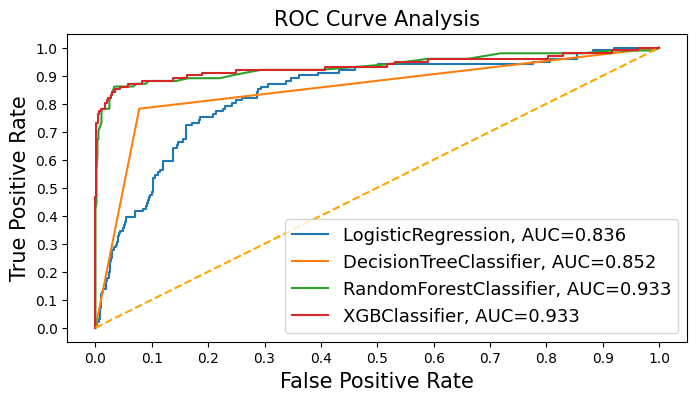

In [81]:
np.random.seed(42)
classifiers = [LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               XGBClassifier()]

# Initialize an empty list to store results
results = []

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_resampled, y_train_resampled)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    results.append({'classifiers':cls.__class__.__name__,
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'auc':auc})

# Concatenate the results into a DataFrame
result_table = pd.DataFrame(results)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,4))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()



- The AUC (Area Under the ROC Curve) measures the ability of a classifier to distinguish between positive and negative classes across all possible thresholds.
  
- Logistic Regression: AUC = 0.836, indicating good performance but relatively lower than other models.
  - 
Decision Tree: AUC = 0.852, showing slightly better performance compared to logistic regression
- 
  .- 
Random Forest and XGBoost: Both have AUC = 0.933, indicating strong performance, likely due to their ensemble nature and ability to capture complex relationships in the data.

## Model Tuning

- This process aims to find the optimal combination of hyperparameters that maximizes the model's performance metrics, such as accuracy, precision, recall, or area under the ROC curve (AUC)

- Tuning will be applied to the Random Forest and XGBoost models, as they exhibited the highest performance compared to other classifiers.
- By fine-tuning these models, the aim is to enhance their predictive capabilities and improve their ability to generalize to new data.

## Tuning Random Forest

In [82]:
#Define the hyperparameter grid
param_grid = {
    "max_depth": [8,15,20],
    "n_estimators":[500,1000],
    "min_samples_split":[5,10,15],
    "criterion":['entropy','gini']
    }
# Create an instance of the RandomForest classifier
rf = RandomForestClassifier(random_state = 42)
# Create GridSearchCV object with the defined parameter grid and scoring metric
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=False)

#Fit the GridsearchCV object to the training data
grid_search.fit(X_train_resampled,y_train_resampled)

#print the best parameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 1000}


In [83]:
# Create an instance of the RandomForest classifier with best params
rf_tuned = RandomForestClassifier(criterion = 'entropy',
                                  max_depth = 20,
                                  min_samples_split = 5,
                                  n_estimators = 1000,
                                  random_state=42)
#Fit the model on the training data
rf_tuned.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=1000, random_state=42)

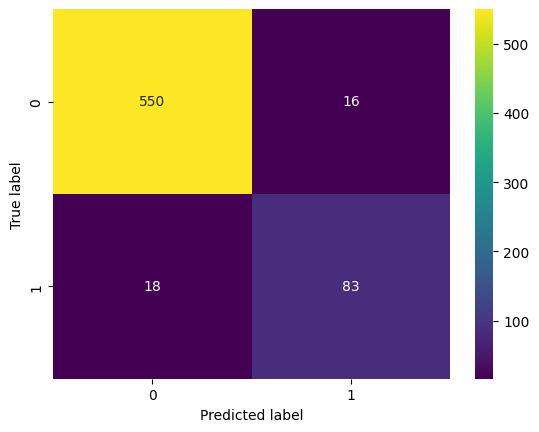

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       566
           1       0.84      0.82      0.83       101

    accuracy                           0.95       667
   macro avg       0.90      0.90      0.90       667
weighted avg       0.95      0.95      0.95       667



In [84]:
#Predict on the test data
y_pred_tuned = rf_tuned.predict(X_test)
#The confusion matrix
plot_confusion_matrix(y_test, y_pred_tuned, [0,1])
#print the classification report
print(classification_report(y_test,y_pred_tuned))

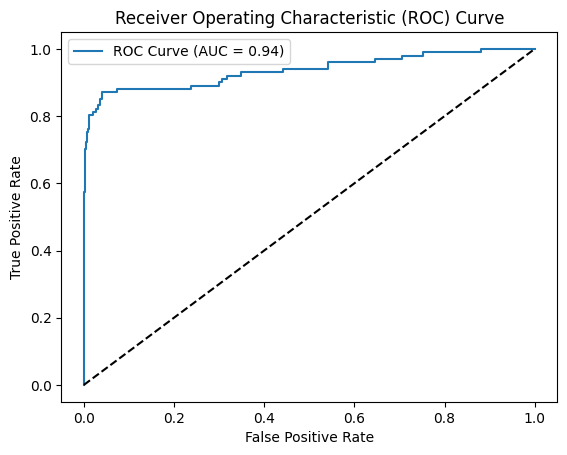

In [85]:
y_proba = rf_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

- Precision: For class 0 (non-churn), precision is 0.97, indicating that 97% of the predicted non-churn cases were correct. For class 1 (churn), precision is 0.84, indicating that 84% of the predicted churn cases were correct.
- Recall: Recall for class 0 is 0.97, meaning 97% of the actual non-churn cases were identified correctly. For class 1, recall is 0.82, indicating that 82% of the actual churn cases were identified correctly.
- ROC AUC: The area under the ROC curve (ROC AUC) is 0.94, which represents the model's ability to distinguish between positive and negative classes.
- The optimized random forest model exhibits strong performance, showing high precision, recall, accuracy and ROC AUC score

## Tuning XGBoost

In [86]:
#Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [1,2,5,10],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100,200],
}
#Create an instance of XGBoost Classifier
xgb = XGBClassifier(random_state = 42)
# Create GridSearchCV object 
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring = 'recall',n_jobs=1)
#Fit the GridsearchCV object to the training data
grid_search.fit(X_train_resampled,y_train_resampled)

#print the best parameters
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.7}


In [87]:
#Create an instance of XGBoost Classifier with best params
xgb_tuned = XGBClassifier(learning_rate = 0.1,
                          max_depth = 10,
                          min_child_weight = 1,
                          n_estimators = 100,
                          subsample = 0.5,
                          random_state = 123)

#Fit on the training data
xgb_tuned.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

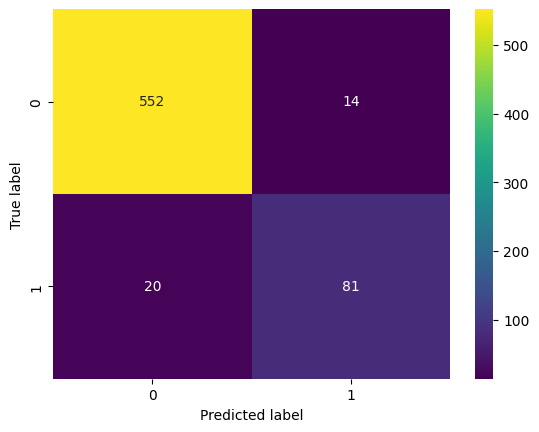

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       566
           1       0.85      0.80      0.83       101

    accuracy                           0.95       667
   macro avg       0.91      0.89      0.90       667
weighted avg       0.95      0.95      0.95       667



In [88]:
#Predict on the test data
y_pred_xgt = xgb_tuned.predict(X_test)
#Confusion matrix
plot_confusion_matrix(y_test, y_pred_xgt, [0,1])
#Classification report
print(classification_report(y_test, y_pred_xgt))

- The tuned XGBoost model demonstrates strong performance with a precision of 0.97 for non-churn customers (class 0) and 0.85 for churn customers (class 1), indicating high accuracy in classifying both categories.
- Recall scores are 0.98 for class 0 and 0.80 for class 1, suggesting that while the model correctly identifies most non-churn instances, it may miss some churn instances.
- Overall accuracy stands at 0.95, indicating that the model correctly predicts 95% of the instances in the test set.

- Out of all the models evaluated, the tuned Random Forest performed the best, achieving a recall of 82%, surpassing the 80% target set for the model.
- By identifying potential churners more effectively, SyriaTel can implement proactive measures to mitigate attrition, enhancing customer retention and and boosting company revenues.







## Conclusion

- Customers who made three calls to customer service exhibited the lowest churn rate, suggesting that this level of interaction may indicate satisfaction or issue resolution.
- Conversely, as the number of customer service calls increases, churn rates tend to rise, indicating potential dissatisfaction or unresolved issues.
- Churned customers tend to have higher average total day minutes of approximately 206.91 compared to non-churned customers, implying that customers with higher daytime usage are more likely to churn.
- Similarly, churned customers exhibit a higher average total day charge of around 35.81 compared to non-churned customers, suggesting that customers with higher charges for daytime usage are more likely to churn.
- Customers with internation plan have lower churn rate
- The tuned Random Forest model demonstrated the best performance, exceeding the target recall of 80%.

## Recommendations

To enhance customer retention at SyriaTel, it's crucial to integrate the machine learning model for real-time predictions. Continuous real-time monitoring ensures that the model continuously learns and enhances its accuracy over time. By utilizing feature importance, valuable insights can be derived to identify areas for service enhancements and personalize retention initiatives.

- Implement loyalty programs to reward frequent users or incentives to high-usage customers to improve retention and reduce churn among this segment.
- Implement proactive customer service strategies by Using surveys, reviews, and feedback forms to understand customer satisfaction and areas for improvement, particularly for customers who have made multiple calls to customer service.
- Company should look into the call charge rates in comparison to the competitors, and consider if they should lower the charges of calls per minute. This can prevent other customers from churning.
- Improve the features with lower importance but still relevant to reduce churn. These features may have potential for improvement or further analysis.
- SyriaTel should encourage its customers to take up international plan as the customers within international plan have low churn rate.
- Utilize the tuned Random Forest model to predict and mitigate churn effectively.

## Next Steps

- Implement model insights into customer retention strategies and campaigns.
- Continuously monitor model performance and update as necessary to adapt to changing customer behaviors.
- Explore additional data sources or features to enhance predictive accuracy.
- Conduct regular customer feedback surveys to identify underlying reasons for churn and refine predictive models accordingly.



